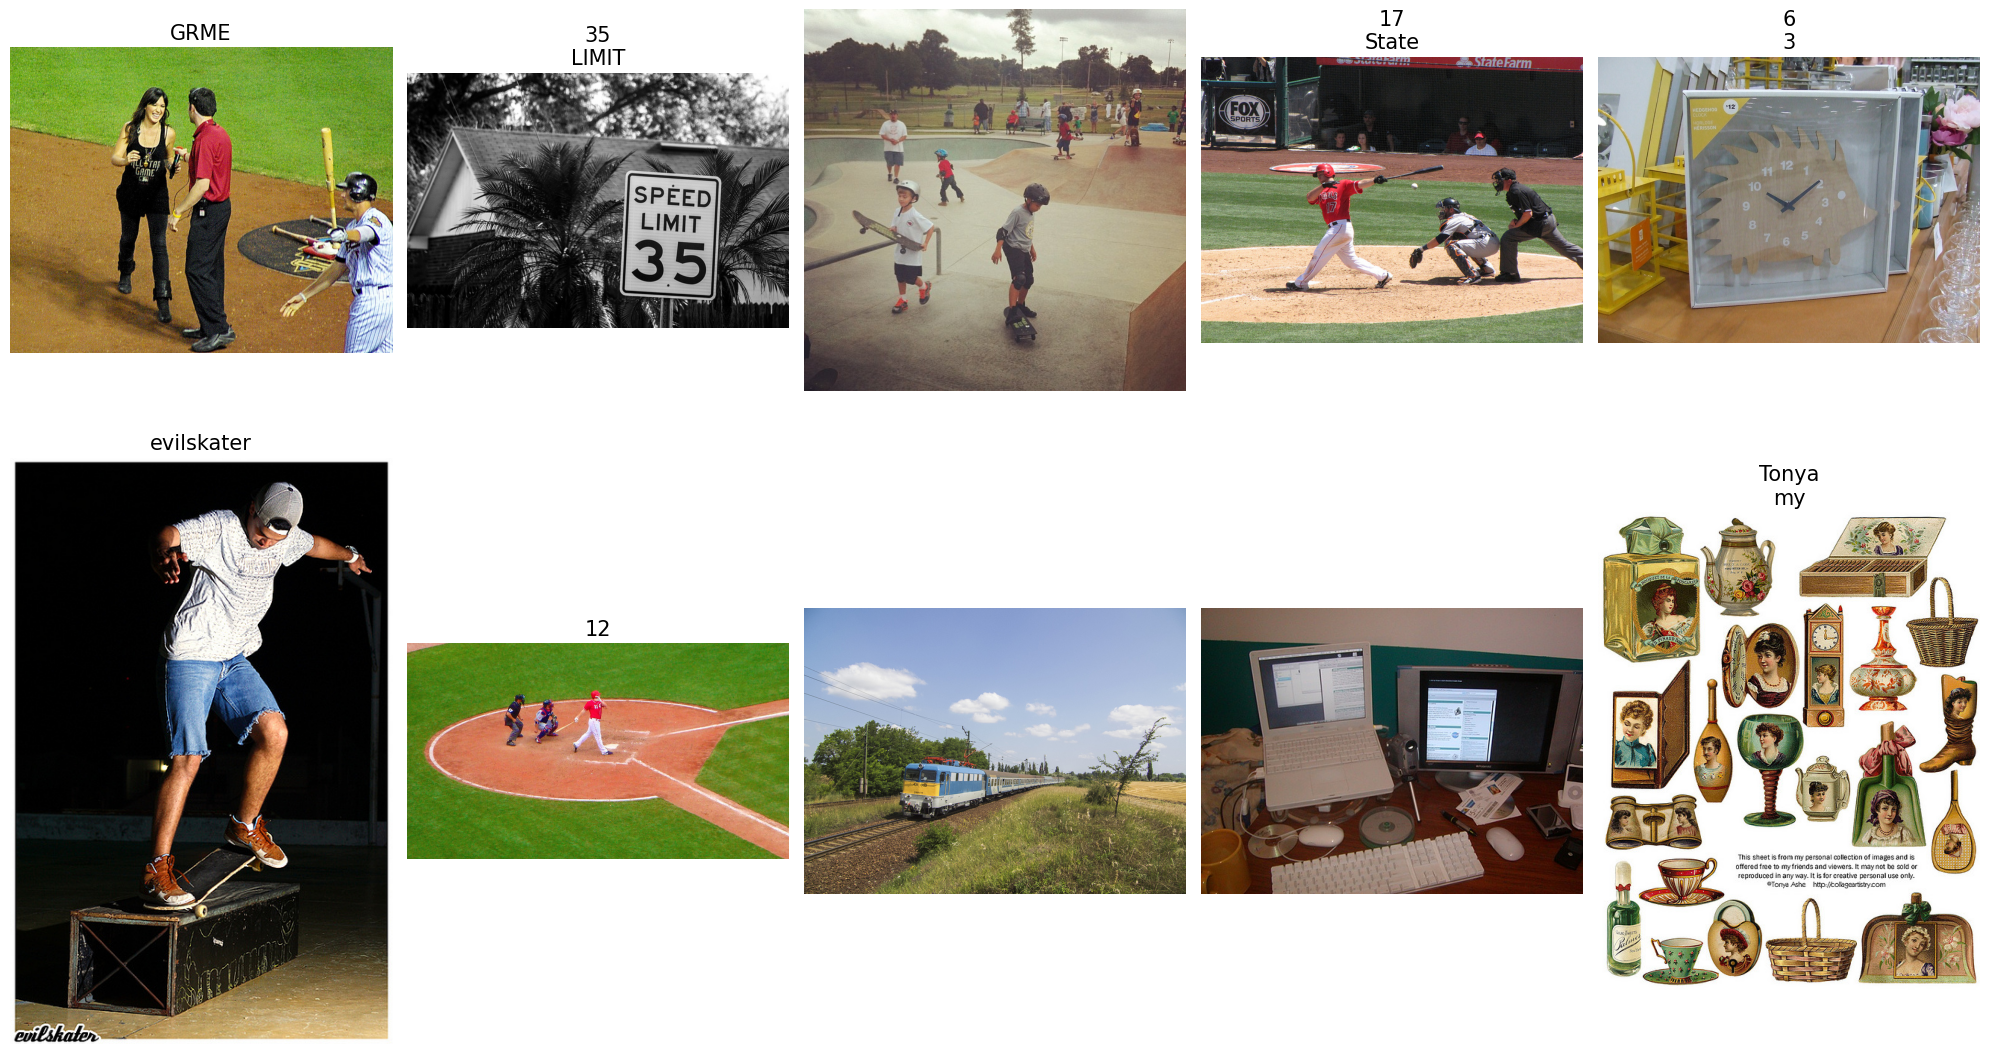

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
from collections import defaultdict
import json
import os


annotations_zip = '../data/raw/cocotext.v2.zip'

with zipfile.ZipFile(annotations_zip, 'r') as zipf:
    with zipf.open('cocotext.v2.json') as file:
        coco_text = json.load(file)

id_to_filename = {
    int(k): v['file_name']
    for k, v in coco_text['imgs'].items()
    if v['set'] == 'train'
}

anotaciones_por_imagen = defaultdict(list)
for ann in coco_text['anns'].values():
    anotaciones_por_imagen[ann['image_id']].append(ann)

imagenes_disponibles = []
for img_id, filename in id_to_filename.items():
    ruta = os.path.join('../data/raw/subset/train2014', filename.split('/')[-1])
    if os.path.exists(ruta):
        imagenes_disponibles.append((img_id, ruta))
    if len(imagenes_disponibles) == 10:
        break

fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

for i, (img_id, ruta_img) in enumerate(imagenes_disponibles):
    img = Image.open(ruta_img)
    axs[i].imshow(img)
    axs[i].axis('off')
    
    # get anns 
    textos = [
        ann['utf8_string']
        for ann in anotaciones_por_imagen[img_id]
        if ann['legibility'] == 'legible' and 'utf8_string' in ann
    ]
    
    axs[i].set_title('\n'.join(textos[:2]), fontsize=15)

plt.tight_layout()
plt.show()

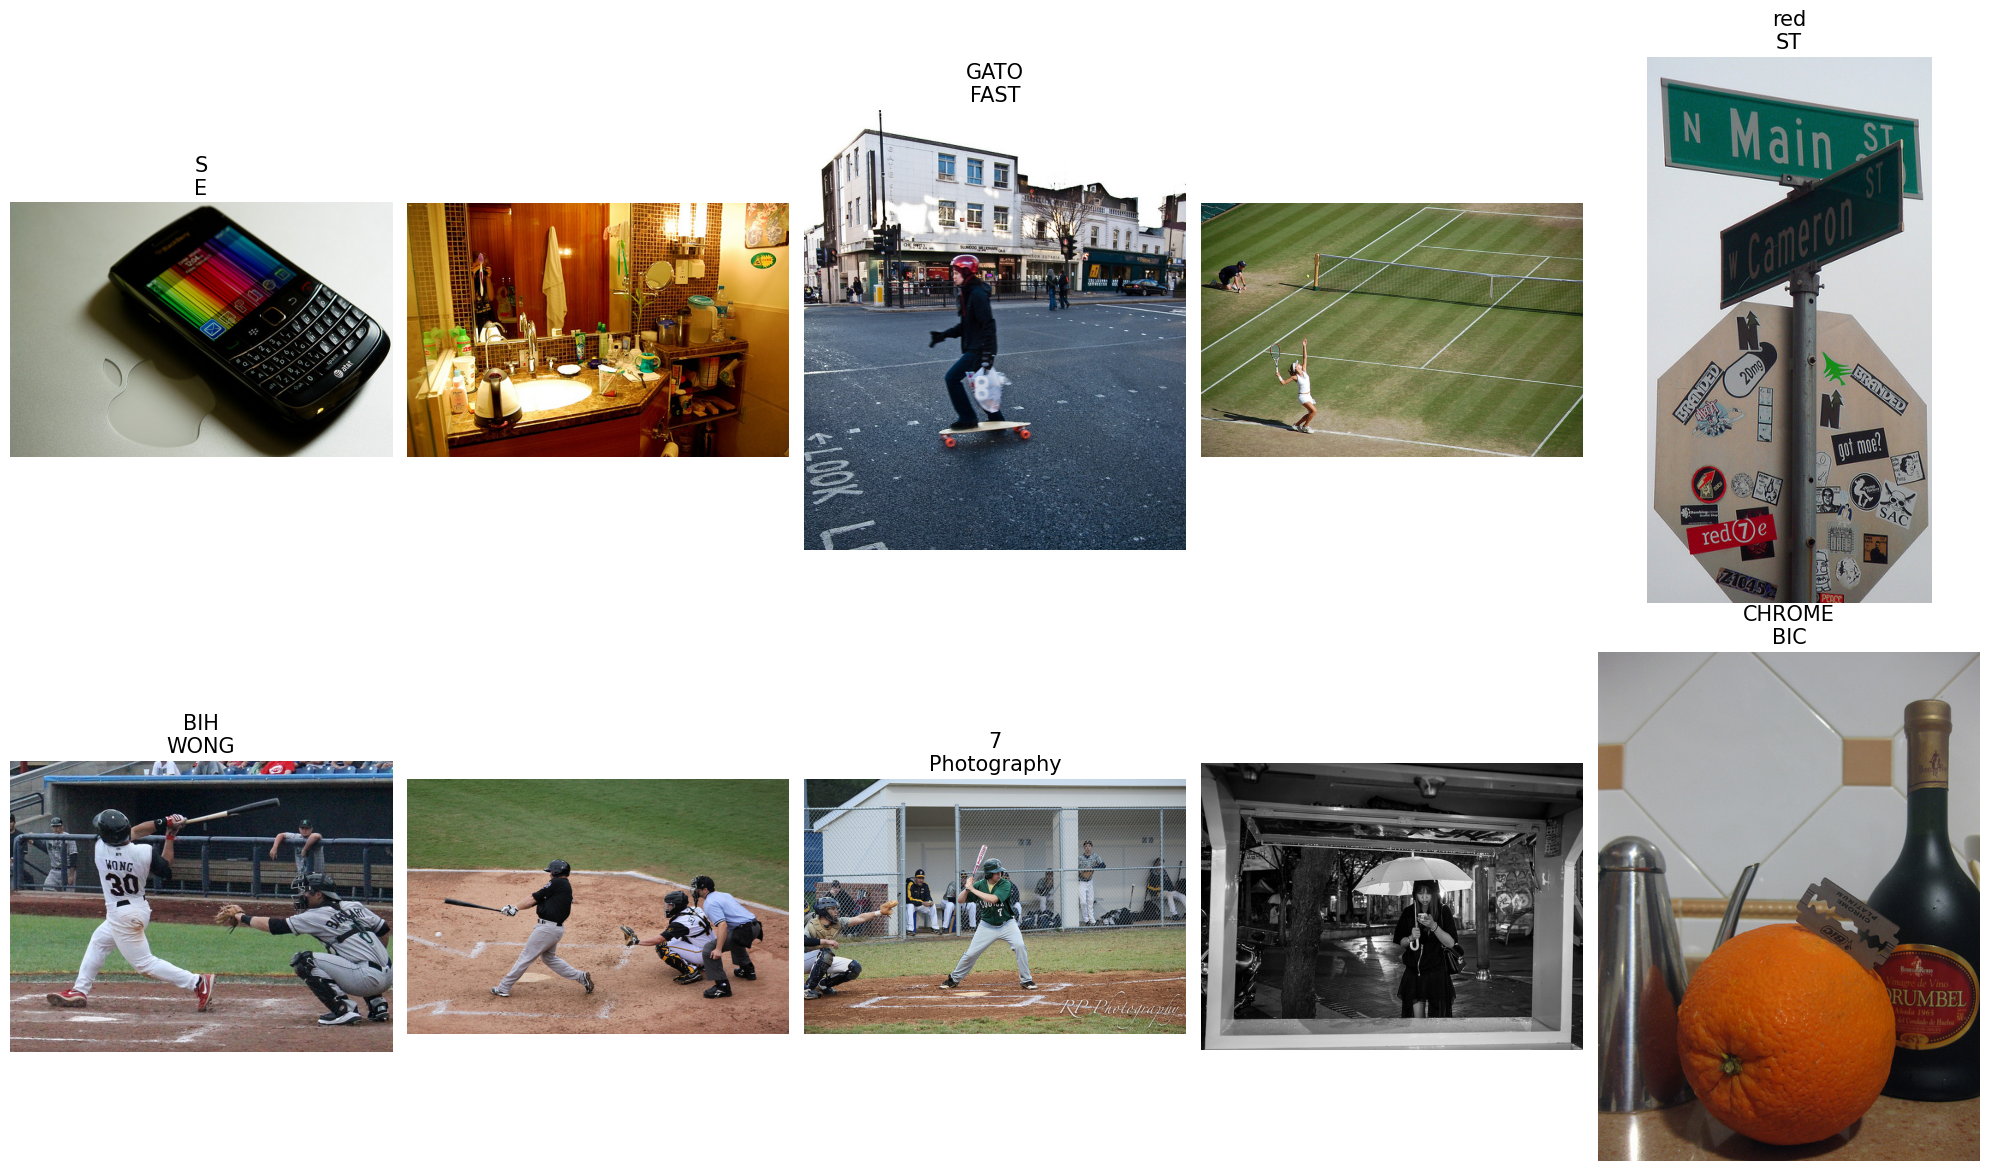

In [3]:
imagenes_disponibles = []
for img_id, filename in id_to_filename.items():
    ruta = os.path.join('../data/raw/subset/val2014', filename.split('/')[-1])
    if os.path.exists(ruta):
        imagenes_disponibles.append((img_id, ruta))
    if len(imagenes_disponibles) == 10:
        break

fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

for i, (img_id, ruta_img) in enumerate(imagenes_disponibles):
    img = Image.open(ruta_img)
    axs[i].imshow(img)
    axs[i].axis('off')
    
    # get anns 
    textos = [
        ann['utf8_string']
        for ann in anotaciones_por_imagen[img_id]
        if ann['legibility'] == 'legible' and 'utf8_string' in ann
    ]
    
    axs[i].set_title('\n'.join(textos[:2]), fontsize=15)

plt.tight_layout()
plt.show()